# 3.2 Logistic Regression (wine)

Input variables (based on physicochemical tests):

   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
Output variable (based on sensory data): 

   12 - quality (score between 0 and 10)

## Importing the libraries

In [3]:
!pip install pandas-profiling
!pip install ipywidgets

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Part 1: Load  data

In [5]:
# wine_data = pd.read_csv('./data/wine.csv')
wine_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=wine')

In [6]:
wine_data.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  
3      9.8    good  
4      9.4     bad

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [8]:
from ydata_profiling import ProfileReport
ProfileReport(wine_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.1 Explore data

The Prevalence of Each Classification Category

<Axes: xlabel='quality', ylabel='count'>

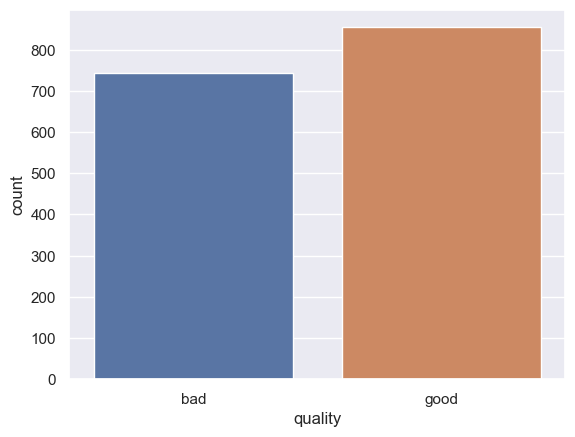

In [9]:
import seaborn as sns
sns.countplot(x='quality', data=wine_data)

### TODO: More exploration

## Part 2: Preprocess data

In [10]:
wine_data.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
1594    False    False  
1595    False    False  
1596    False    False  
1597    False    False  
1598    False    False  

[1599 rows x 12 columns]

<Axes: >

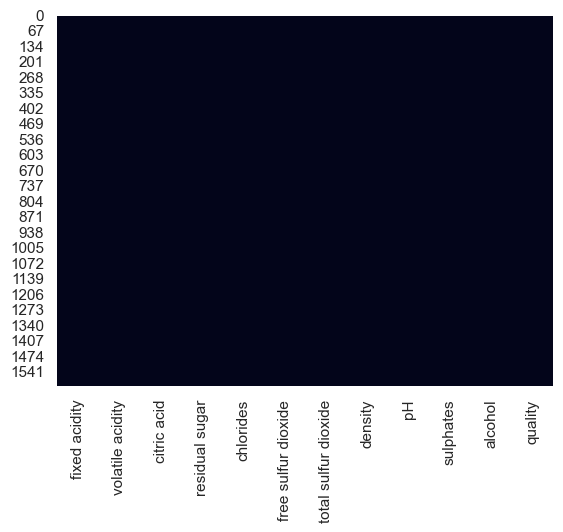

In [11]:
sns.heatmap(wine_data.isnull(), cbar=False)

In [12]:
# Check missing value in data
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Handling Categorical Data With Dummy Variables

In [13]:
wine_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
0         9.4     bad  
1         9.8     bad  
2         9.8     bad  
3         9.8    good  
4         9.4     bad  
...       ...     ...  
1594     10.5     bad  
1595     11.2    good  
1596     11.0    good  
1597     10.2     bad  
1598     11.0    good  

[1599 rows x 12 columns]

In [14]:
wine_data['quality'] = [1 if element == 'good' else 0 for element in wine_data['quality']]

### TODO: Correlation

### TODO: Train/Test separation

X/y separation

In [15]:
y_data = wine_data['quality']

x_data = wine_data.drop('quality', axis = 1)

Perform hold-out method
- 80% training set
- 20% testing set

In [16]:
from sklearn.model_selection import train_test_split

### TODO: Feature Scaling

In [17]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

## TODO: Part 3: Train a logistic regression model

In [19]:
from sklearn.linear_model import LogisticRegression


Making Predictions With Our Logistic Regression Model

## TODO: Part 4: Model Evaluation

Evaluation metrics
- confusion metrix
- accuracy
- precision, recall, f1-score

Measuring the Performance

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


confusion matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

print("accuracy: ", accuracy_score(y_test_data, predictions))

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test_data,
        y_test_data,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    plt.grid(False)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Part 5: Model tuning

### TODO: Try tuning the model to see if you can make it perform better?

You can look at the parameters and functions of Logistic Regression at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### TODO: Try tuning Hyperparameter
***Note that to do this properly, you should split data into train/validation/test set and tune them on validation set, not test set***

C is float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization

### TODO: Parameter Tuning with K-Folds Cross Validation

### TODO: Feature importance